## KNN na prática

$d(p,q)=\sum(q_i, p_i)^2$

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import pickle

In [2]:
dataset = pd.read_csv("data/credito.csv")

In [3]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [4]:
dataset = dataset.drop(['Ethnicity'], axis=1)

In [5]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [6]:
def label_encoder(col):
    encoder = LabelEncoder()
    dataset[col] = encoder.fit_transform(dataset[col])

In [7]:
label_encoder('Citizen')
label_encoder('Industry')

In [8]:
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,7,1.25,1,1,1,0,0,202,0,1
1,0,58.67,4.460,1,1,9,3.04,1,1,6,0,0,43,560,1
2,0,24.50,0.500,1,1,9,1.50,1,0,0,0,0,280,824,1
3,1,27.83,1.540,1,1,7,3.75,1,1,5,1,0,100,3,1
4,1,20.17,5.625,1,1,7,1.71,1,0,0,0,1,120,0,1


In [9]:
metric = "euclidean" # Medida de distância
k = 3 # Número de vizinhos
knn = KNeighborsClassifier(metric=metric, n_neighbors=k)

In [10]:
knn

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [11]:
X = dataset.drop(['Approved'], axis=1)
y = dataset['Approved']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [13]:
preds = knn.predict(X_val) # Resposta do modelo

In [14]:
# VP FP
# FN VN
cm = confusion_matrix(y_val, preds)

In [15]:
cm

array([[57, 17],
       [24, 40]])

In [16]:
accuracy_score(y_val, preds)

0.7028985507246377

In [17]:
cm_plot = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

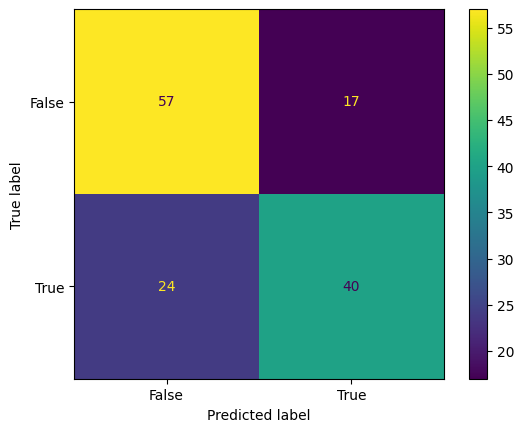

In [18]:
cm_plot.plot()

In [19]:
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model, file)

def load_model(filename):
    with open(filename, 'rb') as file:
        model = pickle.load(file)
        return model

In [20]:
save_model(knn, 'knn_credit.pkl')

In [21]:
modelo_credito = load_model('knn_credit.pkl')

In [22]:
modelo_credito.predict_proba(X_val)

array([[0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.

In [23]:
X_val

,Gender,Age,Debt,Married,BankCustomer,Industry,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income
275,1,18.58,5.71,1,1,10,0.540,0,0,0,0,0,120,0
132,0,47.42,8.00,1,1,3,6.500,1,1,6,0,0,375,51100
579,1,39.08,6.00,1,1,0,1.290,1,1,5,1,0,108,1097
529,1,43.25,25.21,1,1,9,0.210,1,1,1,0,0,760,90
71,1,34.83,4.00,1,1,10,12.500,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,1,23.25,1.50,1,1,9,2.375,1,1,3,1,0,0,582
348,1,63.33,0.54,1,1,4,0.585,1,1,3,1,0,180,0
642,1,31.58,0.75,0,0,2,3.500,0,0,0,1,0,320,0
643,0,52.50,7.00,1,1,2,3.000,0,0,0,0,0,0,0
